In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [86]:
# test df 
dm_hf = -461.4377529972
dm_dfhf = -461.436899197981

mm_hf = -230.722178456155
mm_dfhf = -230.721753826905

de_hf = dm_hf - mm_hf * 2
de_dfhf = dm_dfhf - mm_dfhf * 2
print(de_hf,de_dfhf)
print(de_hf-de_dfhf)

0.006603915110019898 0.0066084558289958295
-4.540718975931668e-06


In [101]:
# monomer
# converged SCF energy = -230.721753826905
# AFQMC/UCCSD_PT2 energy (direct obs): -231.582236 +/- 0.000253

# schafer 2024 #
mm_hf = -230.722178
mm_mp2 = -0.782673
mm_ccsd = -0.822141
mm_pt = -0.035811
mm_ct = -0.032184
mm_t = -0.036209
mm_ref_ccsd_t = mm_hf + mm_ccsd + mm_pt
mm_ref_ccsd_ct = mm_hf + mm_ccsd + mm_ct
mm_ref_ccsdt = mm_hf + mm_ccsd + mm_t
print(f'Ref CCSD(T) Energy: {mm_ref_ccsd_t:.6f}, E_corr = {mm_ref_ccsd_t-mm_hf:.6f}')
print(f'Ref CCSD(cT) Energy: {mm_ref_ccsd_ct:.6f}, E_corr = {mm_ref_ccsd_ct-mm_hf:.6f}')
print(f'Ref CCSDT Energy: {mm_ref_ccsdt:.6f}, E_corr = {mm_ref_ccsdt-mm_hf:.6f}')
##################

# hf = -230.721753826905
mm_ref_ccsd = -0.82229903 + mm_dfhf
mm_ref_afqmc = -231.582236
mm_ref_afqmc_err = 0.000253
# print(f'Ref CCSD Energy: {mm_ref_ccsd:.6f}')
print(f'Ref AFQMC/CCSD_PT2 Energy: {mm_ref_afqmc:.6f} +/- {mm_ref_afqmc_err:.6f}, E_corr = {mm_ref_afqmc-mm_dfhf:.6f}')

data = '''
#   thresh      MP2            CCSD             AFQMC/CCSD_PT2             mp2_cr        time
    1e-5    -0.77245603     -0.81630015     -0.851300 +/- 0.000306      -0.00993216     1334.72
    3e-6    -0.78017218     -0.82124329     -0.858441 +/- 0.000343      -0.00221601     1953.44
    1e-6    -0.78177571     -0.82219190     -0.860522 +/- 0.000328      -0.00061248     2408.15
    3e-7    -0.78229515     -0.82235961     -0.860874 +/- 0.000403      -0.00009304     3436.65
#   ref     -0.78238819     -0.82229903     -0.860482 +/- 0.000253            -         2082.68
'''

thresh = []
mm_mp2 = []
mm_ccsd = []
mm_afqmc = []
mm_afqmc_err = []
mm_mp2cr = []
for line in data.splitlines():
    if not line.startswith('#') and len(line)>0:
        parts = line.split()
        thresh = np.hstack((thresh,[float(parts[0])]))
        mm_mp2 = np.hstack((mm_mp2,[float(parts[1])]))
        mm_ccsd = np.hstack((mm_ccsd,[float(parts[2])]))
        mm_afqmc = np.hstack((mm_afqmc,[float(parts[3])]))
        mm_afqmc_err = np.hstack((mm_afqmc_err,[float(parts[5])]))
        mm_mp2cr = np.hstack((mm_mp2cr,[float(parts[6])]))

mm_mp2  = mm_dfhf + mm_mp2
mm_ccsd = mm_dfhf + mm_ccsd
mm_afqmc = mm_dfhf + mm_afqmc
mm_afqmc_mp2 = mm_afqmc + mm_mp2cr
print(f'Best LNO-AFQMC/CCSD_PT2 Energy: {mm_afqmc[-1]:.6f} +/- {mm_afqmc_err[-1]:.6f},  E_corr = {mm_afqmc[-1]-mm_dfhf:.6f}')
print(f'Best LNO-AFQMC/CCSD_PT2_mp2 Energy: {mm_afqmc_mp2[-1]:.6f} +/- {mm_afqmc_err[-1]:.6f}, E_corr = {mm_afqmc_mp2[-1]-mm_dfhf:.6f}')

mm_ref_ccsd = np.array([mm_ref_ccsd]*len(mm_ccsd))
mm_ref_afqmc = np.array([mm_ref_afqmc]*len(mm_afqmc))
mm_ref_afqmc_err = mm_ref_afqmc_err
mm_afqmc_err = mm_afqmc_err

Ref CCSD(T) Energy: -231.580130, E_corr = -0.857952
Ref CCSD(cT) Energy: -231.576503, E_corr = -0.854325
Ref CCSDT Energy: -231.580528, E_corr = -0.858350
Ref AFQMC/CCSD_PT2 Energy: -231.582236 +/- 0.000253, E_corr = -0.860482
Best LNO-AFQMC/CCSD_PT2 Energy: -231.582628 +/- 0.000403,  E_corr = -0.860874
Best LNO-AFQMC/CCSD_PT2_mp2 Energy: -231.582721 +/- 0.000403, E_corr = -0.860967


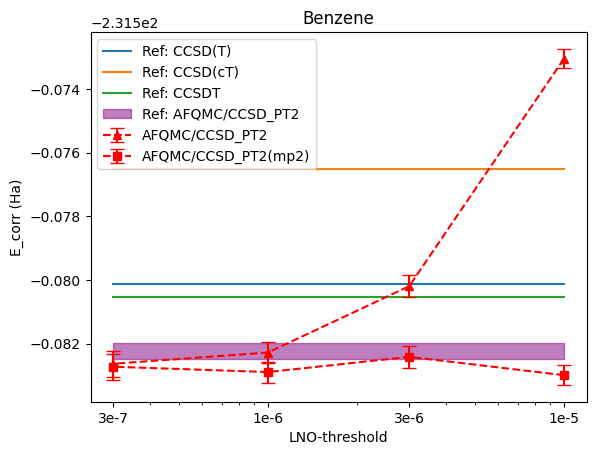

In [65]:
# plt.figure(figsize=(10, 6))
# plt.plot(thresh,mm_ccsd,'^--',color='green',label='CCSD')
# plt.plot(thresh,mm_ccsd+mm_mp2cr,'s--',color='green',label='CCSD(mp2)')
# plt.plot(thresh,mm_ref_ccsd,'-',color='darkgreen',label='Ref: CCSD')
# plt.plot(thresh,mm_ref_afqmc,'-', color='darkred')
x = np.linspace(thresh[0],thresh[-1],50)
plt.plot(x, [mm_ref_ccsd_t]*len(x) ,label='Ref: CCSD(T)')
plt.plot(x, [mm_ref_ccsd_ct]*len(x) ,label='Ref: CCSD(cT)')
plt.plot(x, [mm_ref_ccsdt]*len(x) ,label='Ref: CCSDT')
plt.errorbar(thresh,mm_afqmc,mm_afqmc_err,fmt='^--',capsize=5, color='red', label='AFQMC/CCSD_PT2')
plt.errorbar(thresh,mm_afqmc+mm_mp2cr,mm_afqmc_err,fmt='s--',capsize=5, color='red', label='AFQMC/CCSD_PT2(mp2)')
plt.fill_between(np.linspace(thresh[0],thresh[-1],50),
                 mm_ref_afqmc[0]-mm_ref_afqmc_err,mm_ref_afqmc[0]+mm_ref_afqmc_err,
                 color='purple', alpha = 0.5, label='Ref: AFQMC/CCSD_PT2')
plt.xscale('log')
ticks = [1e-5, 3e-6, 1e-6, 3e-7]
labels = ['1e-5', '3e-6', '1e-6', '3e-7']
plt.xticks(ticks, labels)
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('Benzene')
plt.legend()
plt.show()

In [84]:
# dimer no reference
hf = -461.43689919798

# Schafer 2024 paper #
dm_hf = -461.437753
dm_mp2 = -1.578592
dm_ccsd = -1.652826
dm_pt = -0.073256
dm_ct = -0.065721
dm_t = -0.073716
dm_ref_ccsd_t = dm_hf + dm_ccsd + dm_pt
dm_ref_ccsd_ct = dm_hf + dm_ccsd + dm_ct
dm_ref_ccsdt = dm_hf + dm_ccsd + dm_t
print(f'Ref CCSD(T) Energy: {dm_ref_ccsd_t:.6f}')
print(f'Ref CCSD(cT) Energy: {dm_ref_ccsd_ct:.6f}')
print(f'Ref CCSDT Energy: {dm_ref_ccsdt:.6f}')
##################

# print(f'Ref AFQMC/CCSD_PT2 Correlation Energy: {dm_ref_afqmc:.6f} +/- {dm_ref_afqmc_err:.6f}')

data = '''
#   thresh      MP2            CCSD             AFQMC/CCSD_PT2             mp2_cr        time
    1e-5    -1.55118159     -1.63716411     -1.707833 +/- 0.000453      -0.02689046     4460.00
    3e-6    -1.56998564     -1.64909833     -1.724520 +/- 0.000454      -0.00808641     9603.89
    1e-6    -1.57531734     -1.65225297     -1.727800 +/- 0.000420      -0.00275471     18873.15
    3e-7    -1.57746524     -1.65320692     -1.729766 +/- 0.000469      -0.00060681     42820.69
#   ref     -1.57807205          -                      -            -
'''

thresh = []
dm_mp2 = []
dm_ccsd = []
dm_afqmc = []
dm_afqmc_err = []
dm_mp2cr = []
for line in data.splitlines():
    if not line.startswith('#') and len(line)>0:
        parts = line.split()
        thresh = np.hstack((thresh,[float(parts[0])]))
        dm_mp2 = np.hstack((dm_mp2,[float(parts[1])]))
        dm_ccsd = np.hstack((dm_ccsd,[float(parts[2])]))
        dm_afqmc = np.hstack((dm_afqmc,[float(parts[3])]))
        dm_afqmc_err = np.hstack((dm_afqmc_err,[float(parts[5])]))
        dm_mp2cr = np.hstack((dm_mp2cr,[float(parts[6])]))

dm_afqmc = dm_dfhf + dm_afqmc
dm_afqmc_mp2 = dm_afqmc + dm_mp2cr

print(f'Best LNO-AFQMC/CCSD_PT2 Energy: {dm_afqmc[-1]:.6f} +/- {dm_afqmc_err[-1]:.6f}')
print(f'Best LNO-AFQMC/CCSD_PT2_mp2 Energy: {dm_afqmc_mp2[-1]:.6f} +/- {dm_afqmc_err[-1]:.6f}')

Ref CCSD(T) Energy: -463.163835
Ref CCSD(cT) Energy: -463.156300
Ref CCSDT Energy: -463.164295
Best LNO-AFQMC/CCSD_PT2 Energy: -463.166665 +/- 0.000469
Best LNO-AFQMC/CCSD_PT2_mp2 Energy: -463.167272 +/- 0.000469


In [85]:
-463.167272 - -463.164295

-0.0029770000000439722

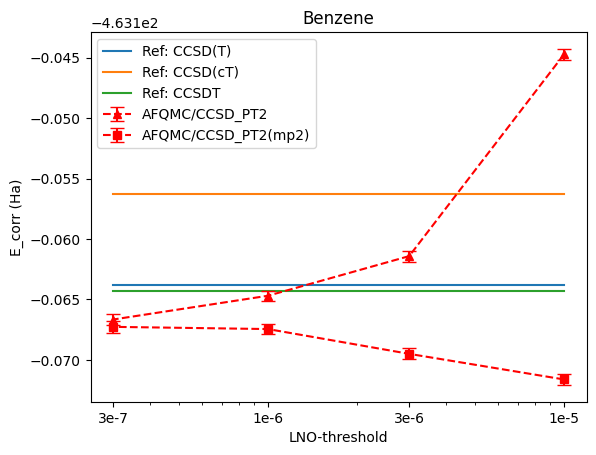

In [70]:
x = np.linspace(thresh[0],thresh[-1],50)
plt.plot(x, [dm_ref_ccsd_t]*len(x), label='Ref: CCSD(T)')
plt.plot(x, [dm_ref_ccsd_ct]*len(x), label='Ref: CCSD(cT)')
plt.plot(x, [dm_ref_ccsdt]*len(x), label='Ref: CCSDT')
plt.errorbar(thresh,dm_afqmc,dm_afqmc_err,fmt='^--',capsize=5, color='red', label='AFQMC/CCSD_PT2')
plt.errorbar(thresh,dm_afqmc+dm_mp2cr,dm_afqmc_err,fmt='s--',capsize=5, color='red', label='AFQMC/CCSD_PT2(mp2)')
# plt.plot(thresh,dm_ref_afqmc,'-', color='darkred')
# plt.fill_between(np.linspace(thresh[0],thresh[-1],50),
#                  dm_ref_afqmc[0]-dm_ref_afqmc_err,dm_ref_afqmc[0]+dm_ref_afqmc_err,
#                  color='purple', alpha = 0.5, label='Ref: AFQMC/CCSD_PT2')
plt.xscale('log')
ticks = [1e-5, 3e-6, 1e-6, 3e-7]
labels = ['1e-5', '3e-6', '1e-6', '3e-7']
plt.xticks(ticks, labels)
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('Benzene')
plt.legend()
plt.show()

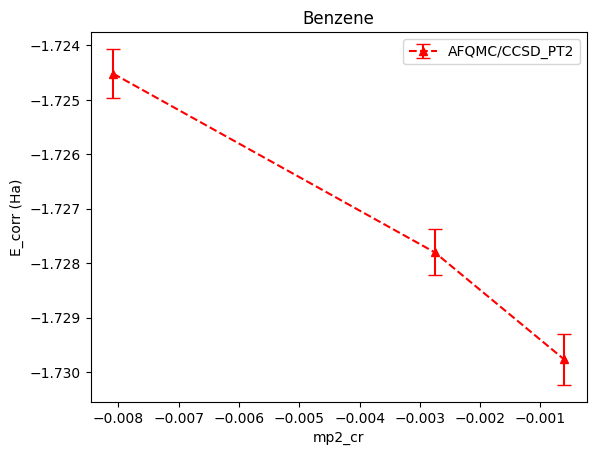

In [97]:
plt.errorbar(dm_mp2cr[1:],dm_afqmc[1:]-dm_dfhf,dm_afqmc_err[1:],fmt='^--',capsize=5, color='red', label='AFQMC/CCSD_PT2')
# plt.errorbar(dm_mp2cr[1:],dm_afqmc_mp2[1:]-dm_dfhf,dm_afqmc_err[1:],fmt='s--',capsize=5, color='red', label='AFQMC/CCSD_PT2(mp2)')
# plt.xscale('log')
# ticks = [1e-5, 3e-6, 1e-6, 3e-7]
# labels = ['1e-5', '3e-6', '1e-6', '3e-7']
# plt.xticks(ticks, labels)
plt.xlabel('mp2_cr')
plt.ylabel('E_corr (Ha)')
plt.title('Benzene')
plt.legend()
plt.show()

In [106]:
de_ccsd_t = dm_ref_ccsd_t - 2*mm_ref_ccsd_t
de_ccsd_ct = dm_ref_ccsd_ct - 2*mm_ref_ccsd_ct
de_ccsdt = dm_ref_ccsdt - 2*mm_ref_ccsdt
de_afqmc = dm_afqmc - 2*mm_afqmc
de_afqmc_mp2 = dm_afqmc_mp2 - 2*mm_afqmc_mp2
de_afqmc_err = np.sqrt(dm_afqmc_err**2 + 2*mm_afqmc_err**2)
print('Energy Dimer - 2*Monomer (kcal/mol)')
print(f'CCSD(T) DE(dm-mm) = {627.50961*de_ccsd_t:.2f}')
print(f'CCSD(cT) DE(dm-mm) = {627.50961*de_ccsd_ct:.2f}')
print(f'CCSDT DE(dm-mm) = {627.50961*de_ccsdt:.2f}')
print(f'LNO-AFQMC DE(dm-mm) = {627.50961*de_afqmc[-1]:.2f} +/- {627.50961*de_afqmc_err[-1]:.2f}')
print(f'LNO-AFQMC_mp2 DE(dm-mm) = {627.50961*de_afqmc_mp2[-1]:.2f} +/- {627.50961*de_afqmc_err[-1]:.2f}')

Energy Dimer - 2*Monomer (kcal/mol)
CCSD(T) DE(dm-mm) = -2.24
CCSD(cT) DE(dm-mm) = -2.07
CCSDT DE(dm-mm) = -2.03
LNO-AFQMC DE(dm-mm) = -0.88 +/- 0.46
LNO-AFQMC_mp2 DE(dm-mm) = -1.15 +/- 0.46


In [ ]:
x = np.linspace(thresh[0],thresh[-1],50)
dm_ref_ccsd_t = [dm_ref_ccsd_t]*len(x)
dm_ref_ccsd_ct = [dm_ref_ccsd_ct]*len(x)
dm_ref_ccsdt = [dm_ref_ccsdt]*len(x)
plt.plot(x, dm_ref_ccsd_t ,label='Ref: CCSD(T)')
plt.plot(x, dm_ref_ccsd_ct ,label='Ref: CCSD(cT)')
plt.plot(x, dm_ref_ccsdt ,label='Ref: CCSDT')
plt.errorbar(thresh,dm_afqmc,dm_afqmc_err,fmt='^--',capsize=5, color='red', label='AFQMC/CCSD_PT2')
plt.errorbar(thresh,dm_afqmc+dm_mp2cr,dm_afqmc_err,fmt='s--',capsize=5, color='red', label='AFQMC/CCSD_PT2(mp2)')
# plt.plot(thresh,dm_ref_afqmc,'-', color='darkred')
# plt.fill_between(np.linspace(thresh[0],thresh[-1],50),
#                  dm_ref_afqmc[0]-dm_ref_afqmc_err,dm_ref_afqmc[0]+dm_ref_afqmc_err,
#                  color='purple', alpha = 0.5, label='Ref: AFQMC/CCSD_PT2')
plt.xscale('log')
ticks = [1e-5, 3e-6, 1e-6, 3e-7]
labels = ['1e-5', '3e-6', '1e-6', '3e-7']
plt.xticks(ticks, labels)
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('Benzene')
plt.legend()
plt.show()